<a href="https://colab.research.google.com/github/shuvad23/Deep-learning-with-PyTorch/blob/main/Transfer_Learning_using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Transfer Learning
Transfer learning is a **machine learning technique** where a model trained on **one task** is reused as the starting point for a **different but related task**. Instead of training a model **from scratch**, we **transfer knowledge** (learned features, weights, or representations) from an existing trained model to a new problem.

This is especially powerful in **deep learning**, where training large models from zero requires huge data and compute.

---

## 1️⃣ Why Transfer Learning is Needed

Training deep models from scratch:

* Requires **large datasets**
* Takes **lots of time & compute**
* Often **overfits** on small datasets

Transfer learning solves this by:

* Using **pre-trained models** (trained on millions of samples)
* Achieving **better accuracy** with less data
* Training **faster**

📌 Example:
Instead of training a CNN from scratch to detect **medical X-ray diseases**, we reuse a CNN trained on **ImageNet**.

---

## 2️⃣ Real-Life Intuition

Think of learning:

* If you know **English**, learning **German** is easier
* If you know **cycling**, learning **motorcycling** is easier 🚴

Similarly:

* A model trained to recognize **edges, shapes, textures** can reuse this knowledge for new image tasks.

---

## 3️⃣ How Transfer Learning Works (Deep Learning View)

### Pre-trained Model

A model trained on a **large dataset**, e.g.:

* ImageNet (14+ million images)
* Common datasets: COCO, OpenImages

Popular pre-trained models:

* **CNNs**: ResNet, VGG, EfficientNet, MobileNet
* **NLP**: BERT, GPT, RoBERTa
* **Audio**: Wav2Vec

---

## 4️⃣ Types of Transfer Learning

### 🔹 1. Feature Extraction (Most Common)

* Freeze pre-trained layers
* Train only the final classifier

✅ Best when dataset is **small**

Example:

```text
ImageNet CNN → Replace last layer → Train classifier only
```

---

### 🔹 2. Fine-Tuning

* Unfreeze some top layers
* Train with a **low learning rate**

✅ Best when dataset is **medium-sized**

---

### 🔹 3. Full Fine-Tuning

* Train **all layers**
* Requires more data

✅ Best when dataset is **large & similar**

---

### 🔹 4. Domain Adaptation

* Source & target domains differ
* Example:

  * Natural images → Medical images
  * English → Bengali NLP

---

## 5️⃣ Transfer Learning Pipeline (Step-by-Step)

1. Choose a **pre-trained model**
2. Remove final classification layer
3. Add your own classifier
4. Freeze base layers
5. Train classifier
6. Unfreeze top layers (optional)
7. Fine-tune entire model

---

## 6️⃣ Example: Image Classification (PyTorch)

```python
import torchvision.models as models
import torch.nn as nn

model = models.resnet50(pretrained=True)

# Freeze backbone
for param in model.parameters():
    param.requires_grad = False

# Replace classifier
model.fc = nn.Linear(2048, 5)  # 5 classes
```

---

## 7️⃣ NLP Example (BERT)

```text
BERT trained on Wikipedia + Books
↓
Fine-tuned for:
- Sentiment Analysis
- Question Answering
- Named Entity Recognition
```

---

## 8️⃣ When to Use Transfer Learning

| Dataset Size          | Strategy            |
| --------------------- | ------------------- |
| Very small            | Feature extraction  |
| Medium                | Partial fine-tuning |
| Large                 | Full fine-tuning    |
| Very different domain | Domain adaptation   |

---

## 9️⃣ Advantages of Transfer Learning

✅ Faster training
✅ Higher accuracy
✅ Less data needed
✅ Lower compute cost
✅ Better generalization

---

## 🔟 Limitations

❌ Negative transfer (wrong features hurt performance)
❌ Not suitable for **completely unrelated tasks**
❌ Pre-trained bias
❌ Large model size

---

## 1️⃣1️⃣ Transfer Learning vs Training from Scratch

| Aspect        | Transfer Learning | From Scratch |
| ------------- | ----------------- | ------------ |
| Data needed   | Low               | High         |
| Training time | Short             | Long         |
| Performance   | High              | Depends      |
| Compute       | Low               | High         |

---

## 1️⃣2️⃣ Common Use Cases

* Medical image classification 🏥
* Face recognition 😄
* Emotion detection (your CNN project 😉)
* Speech recognition
* Chatbots & LLM fine-tuning

---

## 1️⃣3️⃣ Transfer Learning in Your Context (Recommended)

Since you are working on:

* **Image classification using PyTorch**
* **Medical & emotion detection projects**

👉 Use:

* **ResNet / EfficientNet** for images
* **Fine-tuning top layers**
* **Low learning rate (1e-4 or lower)**

---

## 📚 Best Resources to Learn More

* PyTorch Transfer Learning Docs
* CS231n (Stanford)
* fast.ai Practical Deep Learning
* Google ML Crash Course

---



In [1]:
# imports
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

In [2]:
#Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using Device: ", device)

Using Device:  cuda


In [3]:
# Data Transforms
train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [6]:
# Load Oxford Dataset
train_dataset = datasets.OxfordIIITPet(
    root="./data",
    split="trainval",
    target_types="category",
    transform=train_transforms,
    download=True   # ← PyTorch handles everything
)

test_dataset = datasets.OxfordIIITPet(
    root="./data",
    split="test",
    target_types="category",
    transform=test_transforms,
    download=True
)



In [7]:
# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

classes_names = train_dataset.classes
num_classes = len(classes_names)
print("Total Classes:", num_classes)
print("Classes Names:", classes_names)

Total Classes: 37
Classes Names: ['Abyssinian', 'American Bulldog', 'American Pit Bull Terrier', 'Basset Hound', 'Beagle', 'Bengal', 'Birman', 'Bombay', 'Boxer', 'British Shorthair', 'Chihuahua', 'Egyptian Mau', 'English Cocker Spaniel', 'English Setter', 'German Shorthaired', 'Great Pyrenees', 'Havanese', 'Japanese Chin', 'Keeshond', 'Leonberger', 'Maine Coon', 'Miniature Pinscher', 'Newfoundland', 'Persian', 'Pomeranian', 'Pug', 'Ragdoll', 'Russian Blue', 'Saint Bernard', 'Samoyed', 'Scottish Terrier', 'Shiba Inu', 'Siamese', 'Sphynx', 'Staffordshire Bull Terrier', 'Wheaten Terrier', 'Yorkshire Terrier']


In [8]:
#Transfer Learning Model (ResNet18)
model = models.resnet18(pretrained=True)

#Freeze backbone
for param in model.parameters():
    param.requires_grad = False

#Replace classifier
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 129MB/s]


In [9]:
# loss optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(),lr=0.001)

In [12]:
#Training loop

epochs = 20

for epoch in range(epochs):
    model.train()
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs,1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_accuracy = 100 * correct / total
    print(f'Epoch {epoch+1}/{epochs},Loss: {loss.item():.4f}, Accuracy: {train_accuracy:.4f},')

Epoch 1/20,Loss: 0.3549, Accuracy: 92.4185,
Epoch 2/20,Loss: 0.1160, Accuracy: 93.2337,
Epoch 3/20,Loss: 0.2454, Accuracy: 94.2391,
Epoch 4/20,Loss: 0.2388, Accuracy: 94.7826,
Epoch 5/20,Loss: 0.2277, Accuracy: 94.7011,
Epoch 6/20,Loss: 0.1479, Accuracy: 95.4620,
Epoch 7/20,Loss: 0.1352, Accuracy: 96.2500,
Epoch 8/20,Loss: 0.0930, Accuracy: 96.4402,
Epoch 9/20,Loss: 0.2042, Accuracy: 96.7391,
Epoch 10/20,Loss: 0.1143, Accuracy: 96.6033,
Epoch 11/20,Loss: 0.1038, Accuracy: 96.7935,
Epoch 12/20,Loss: 0.0911, Accuracy: 96.6576,
Epoch 13/20,Loss: 0.2685, Accuracy: 97.0380,
Epoch 14/20,Loss: 0.1042, Accuracy: 97.4457,
Epoch 15/20,Loss: 0.0702, Accuracy: 97.5815,
Epoch 16/20,Loss: 0.1160, Accuracy: 97.9891,
Epoch 17/20,Loss: 0.0689, Accuracy: 98.0707,
Epoch 18/20,Loss: 0.1151, Accuracy: 98.6141,
Epoch 19/20,Loss: 0.0444, Accuracy: 98.2065,
Epoch 20/20,Loss: 0.0292, Accuracy: 98.0978,


In [14]:
#Validation
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images,labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs,1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
print(f'Validation Accuracy: {100 * correct / total:.4f}')

Validation Accuracy: 86.5631


In [15]:
# save this model
torch.save({
    "model_state": model.state_dict(),
    "classes": train_dataset.classes
}, "oxford_pet_transfer_model.pth")


### Confusion Matrix

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [17]:
# Collect True & Predicted Labels
model.eval()

y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())


In [18]:
# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print(cm.shape)   # (num_classes, num_classes)


(37, 37)


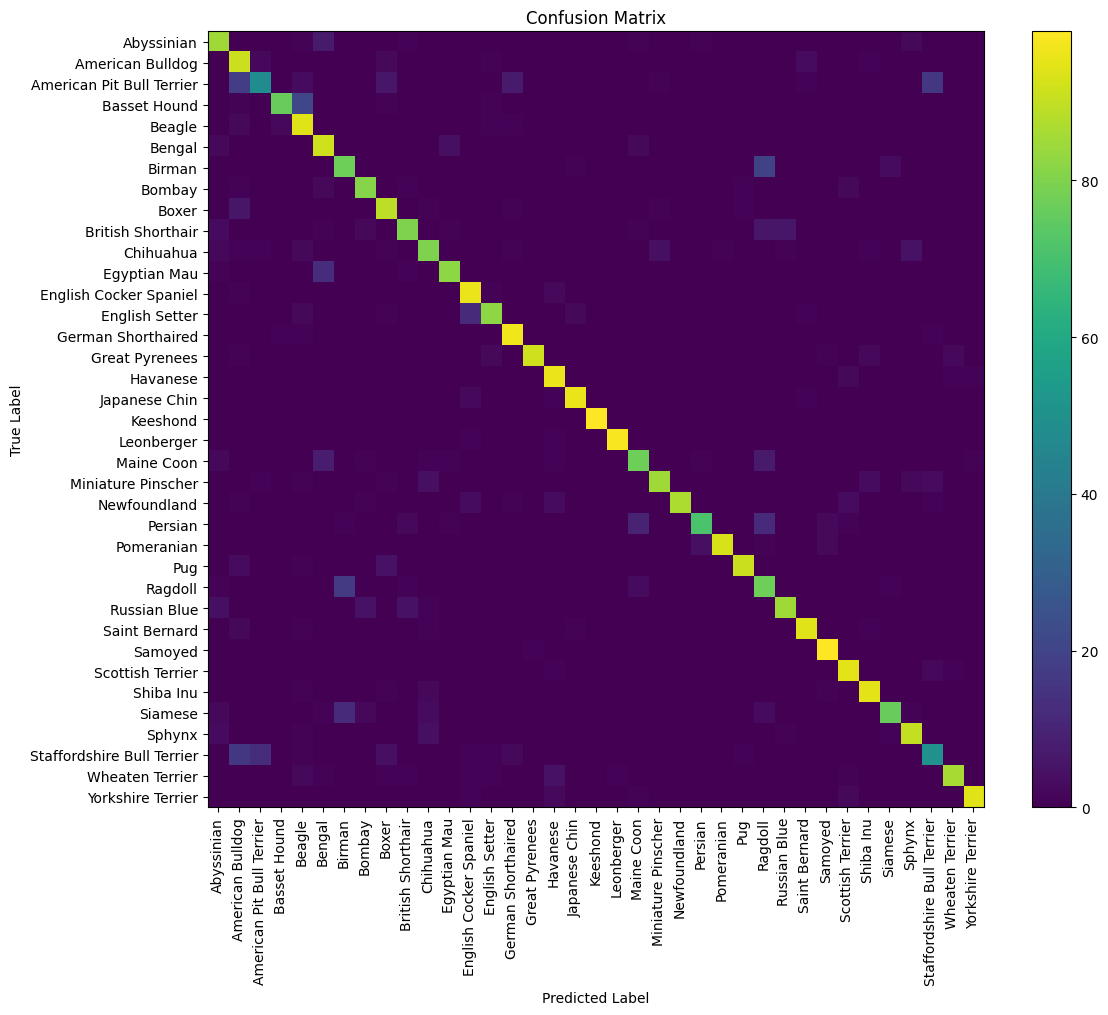

In [19]:
# Plot Confusion Matrix (Matplotlib)
plt.figure(figsize=(12, 10))
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes_names))
plt.xticks(tick_marks, classes_names, rotation=90)
plt.yticks(tick_marks, classes_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


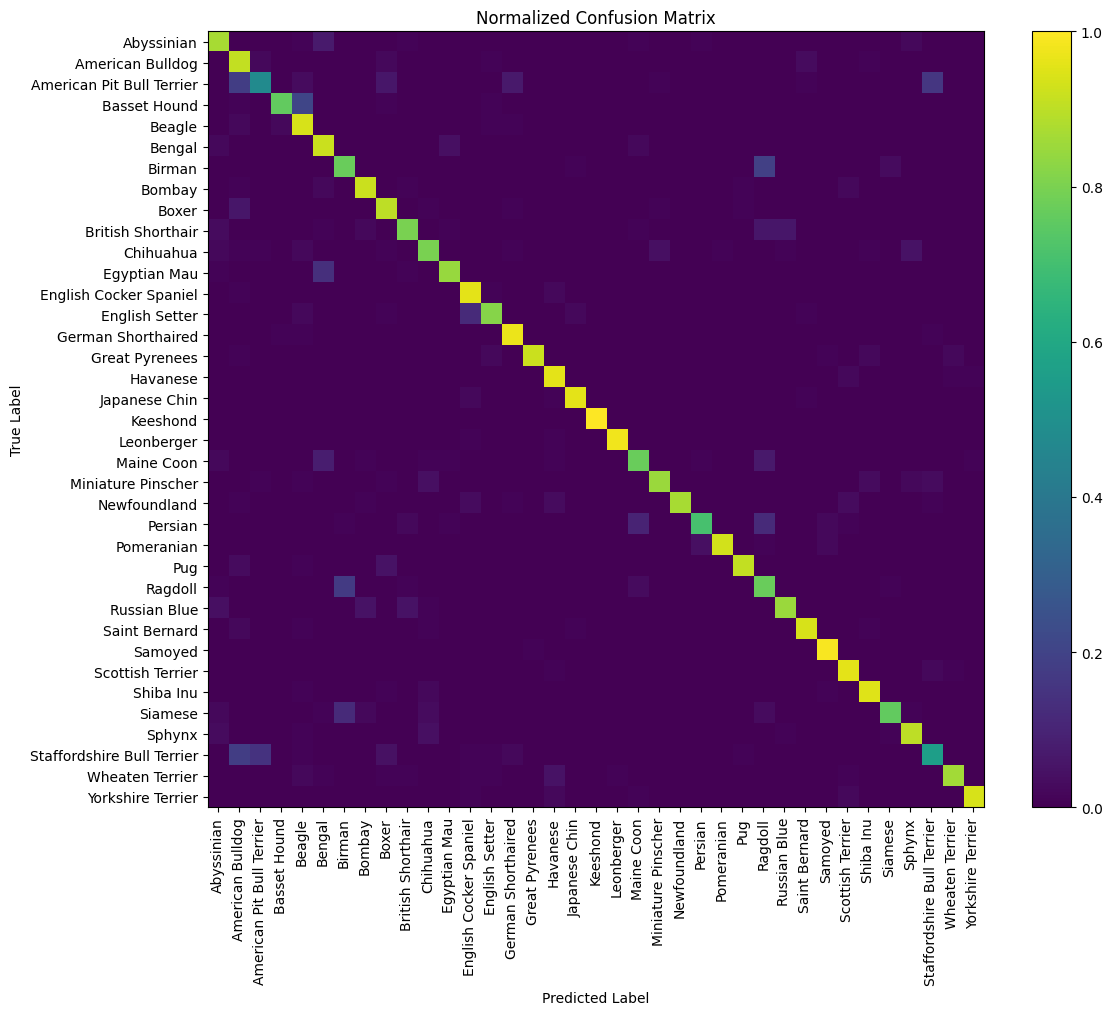

In [20]:
# Normalized Confusion Matrix
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 10))
plt.imshow(cm_norm, interpolation="nearest")
plt.title("Normalized Confusion Matrix")
plt.colorbar()

plt.xticks(tick_marks, classes_names, rotation=90)
plt.yticks(tick_marks, classes_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=classes_names))


                            precision    recall  f1-score   support

                Abyssinian       0.81      0.87      0.84        98
          American Bulldog       0.63      0.91      0.75       100
 American Pit Bull Terrier       0.74      0.48      0.58       100
              Basset Hound       0.96      0.76      0.85       100
                    Beagle       0.71      0.94      0.81       100
                    Bengal       0.74      0.92      0.82       100
                    Birman       0.72      0.77      0.74       100
                    Bombay       0.88      0.92      0.90        88
                     Boxer       0.79      0.90      0.84        99
         British Shorthair       0.87      0.80      0.83       100
                 Chihuahua       0.82      0.80      0.81       100
              Egyptian Mau       0.92      0.85      0.88        97
    English Cocker Spaniel       0.82      0.96      0.88       100
            English Setter       0.91      0.82

In [22]:
from PIL import Image
import torch
from torchvision import transforms, models
import matplotlib.pyplot as plt

# ===== CONFIG =====
MODEL_PATH = "/content/oxford_pet_transfer_model.pth"
IMG_SIZE = 224
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ===== LOAD MODEL =====
# Use same model architecture as during training
model = models.resnet18(pretrained=False)
num_classes = 37  # Oxford-IIIT Pet Dataset has 37 classes
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

# Load checkpoint
loaded_data = torch.load(MODEL_PATH, map_location=device)
model.load_state_dict(loaded_data["model_state"])
model.to(device)
model.eval()

# Class names from checkpoint
class_names = loaded_data["classes"]

# ===== INFERENCE FUNCTION =====
def infer_pet_image(image_path):
    image = Image.open(image_path).convert("RGB")

    transform = transforms.Compose([
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ])

    tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(tensor)
        probs = torch.softmax(outputs, dim=1)
        conf, idx = torch.max(probs, dim=1)

    label = class_names[idx.item()]
    confidence = conf.item()

    # Display image with prediction
    plt.figure(figsize=(5,5))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Prediction: {label}\nConfidence: {confidence*100:.2f}%")
    plt.show()


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Saving download (8).jfif to download (8).jfif


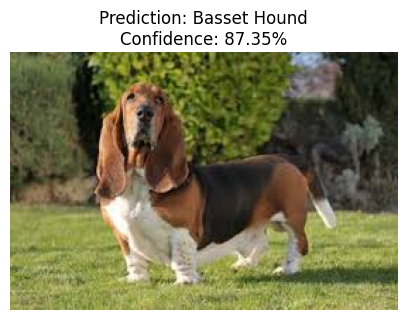

In [23]:
from google.colab import files

uploaded = files.upload()

if uploaded:
    img_path = list(uploaded.keys())[0]
    infer_pet_image(img_path)
else:
    print("No image uploaded")
